In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

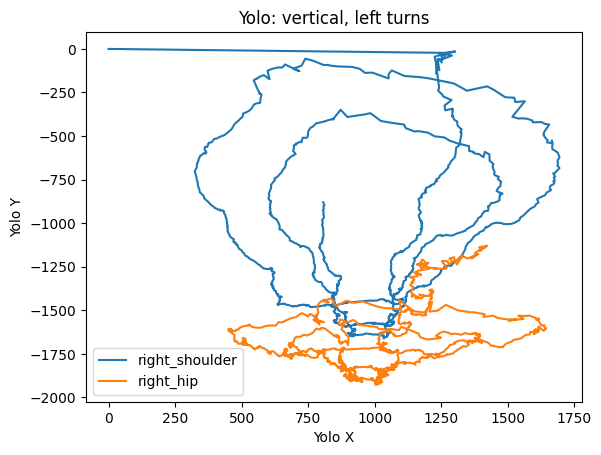

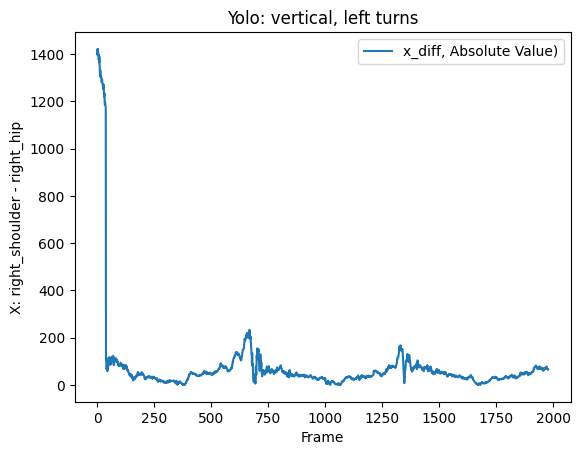

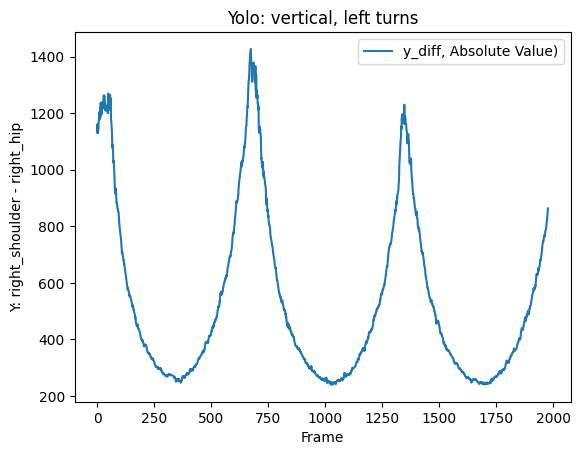

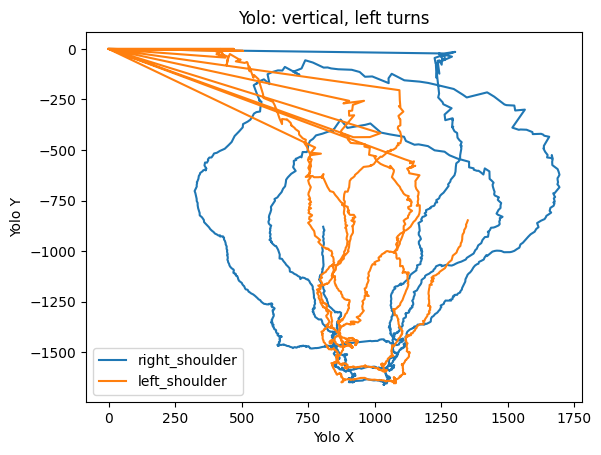

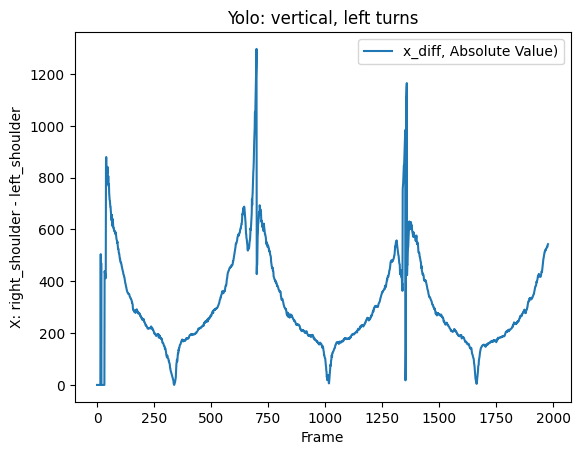

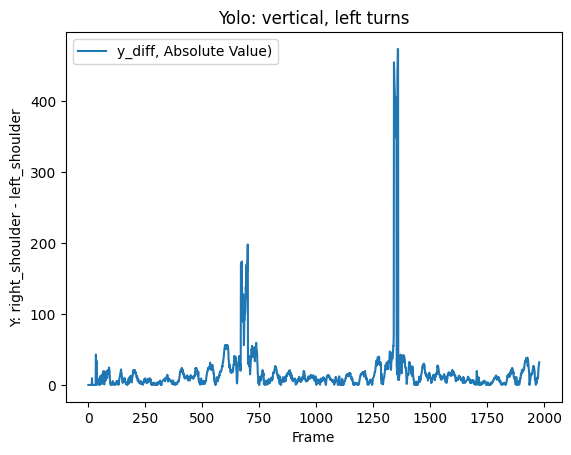

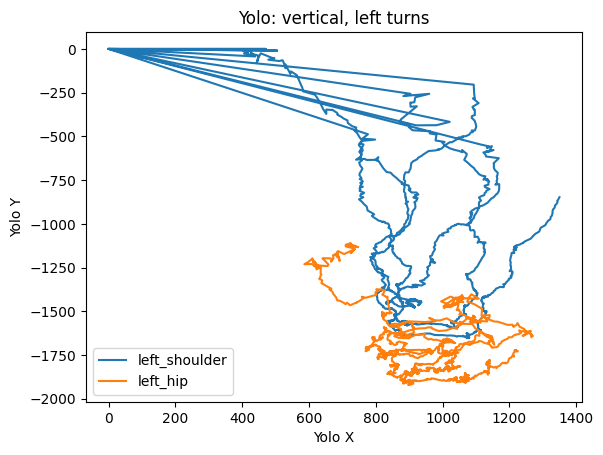

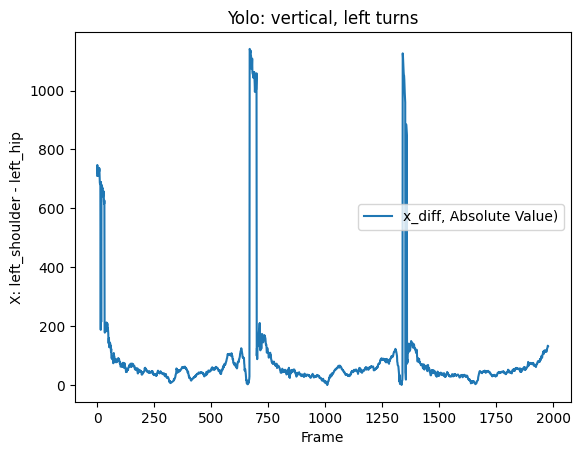

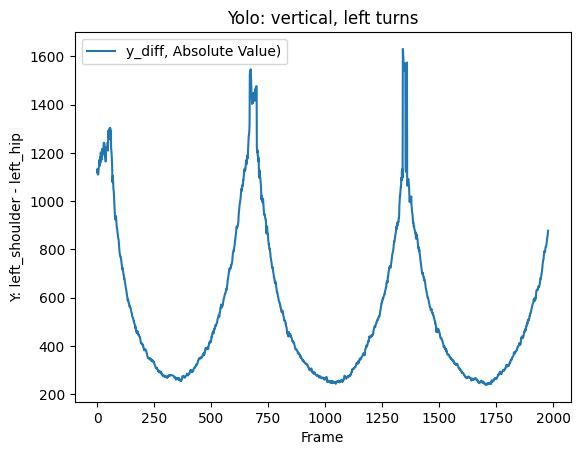

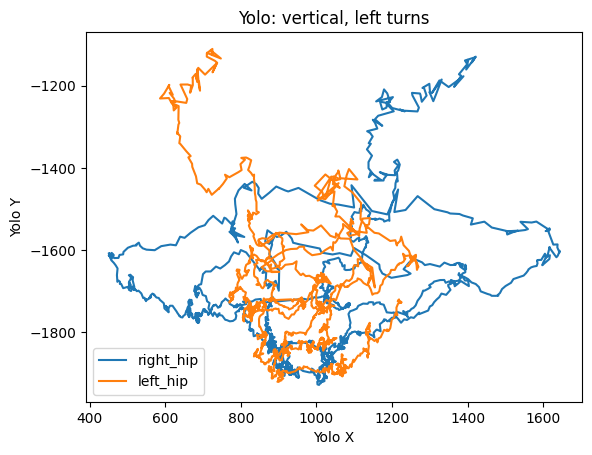

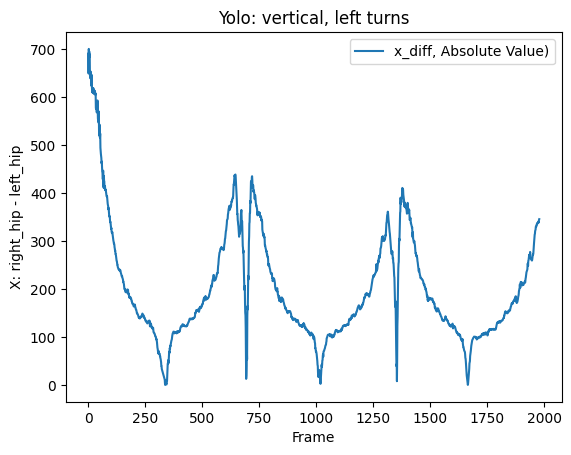

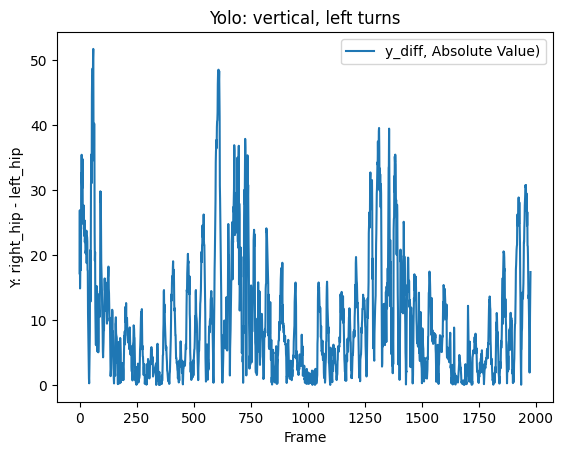

In [53]:
# load yolo data for 1 vertical and one horizontal video 
yolo_horz_l = r'C:\Users\mmccu\Box\MM_Personal\5_Projects\BoveLab\3_Data_and_Code\hva_code\HomeVideoAnalysis\temp\main_branch_outputs\000_run\DS_HC_gait_horizontal_left_yolo.csv'
yolo_horz_r = r'C:\Users\mmccu\Box\MM_Personal\5_Projects\BoveLab\3_Data_and_Code\hva_code\HomeVideoAnalysis\temp\main_branch_outputs\000_run\DS_HC_gait_horizontal_right_yolo.csv'
yolo_vert_l = r'C:\Users\mmccu\Box\MM_Personal\5_Projects\BoveLab\3_Data_and_Code\hva_code\HomeVideoAnalysis\temp\main_branch_outputs\000_run\DS_HC_gait_vertical_left_yolo.csv'
yolo_vert_r = r'C:\Users\mmccu\Box\MM_Personal\5_Projects\BoveLab\3_Data_and_Code\hva_code\HomeVideoAnalysis\temp\main_branch_outputs\000_run\DS_HC_gait_vertical_right_yolo.csv'

# read csv 
yolo_horz_l_df = pd.read_csv(yolo_horz_l, index_col = False)
yolo_horz_r_df = pd.read_csv(yolo_horz_r, index_col = False)
yolo_vert_l_df = pd.read_csv(yolo_vert_l, index_col = False)
yolo_vert_r_df = pd.read_csv(yolo_vert_r, index_col = False)


# function - pick two landmarks, plot x and y position for that marker 
def plot_yolo(yolo_df, video_orientation, turn_direction, landmark_1, landmark_2): 
    # filter df to only contain one landmark 
    yolo_df_1 = yolo_df.loc[(yolo_df['label'] == landmark_1)]
    yolo_df_2 = yolo_df.loc[(yolo_df['label'] == landmark_2)]

    yolo_df_1.index = yolo_df_1['frame']
    yolo_df_2.index = yolo_df_2['frame']

    # plot landmark x and y positions 
    plt.plot(yolo_df_1['X'], -yolo_df_1['Y'], label = landmark_1)
    plt.plot(yolo_df_2['X'], -yolo_df_2['Y'], label = landmark_2)
    plt.xlabel('Yolo X')
    plt.ylabel('Yolo Y')
    plt.title('Yolo: ' + str(video_orientation) + ', ' + str(turn_direction) + ' turns')
    plt.legend()
    plt.show()

    # x distance between two markers 
    x_diff = abs(yolo_df_1['X'] - yolo_df_2['X'])
    plt.plot(yolo_df_1['frame'], x_diff, label = 'x_diff, Absolute Value)')
    plt.xlabel('Frame')
    plt.ylabel('X: ' + landmark_1 + ' - ' + landmark_2)
    plt.title('Yolo: ' + str(video_orientation) + ', ' + str(turn_direction) + ' turns')
    plt.legend()
    plt.show()


    # y distance between two markers 
    y_diff = abs(yolo_df_1['Y'] - yolo_df_2['Y'])
    plt.plot(yolo_df_1['frame'], y_diff, label = 'y_diff, Absolute Value)')
    plt.xlabel('Frame')
    plt.ylabel('Y: ' + landmark_1 + ' - ' + landmark_2)
    plt.title('Yolo: ' + str(video_orientation) + ', ' + str(turn_direction) + ' turns')
    plt.legend()
    plt.show()


# horizontal video, shoulder and hip
#plot_yolo(yolo_horz_l_df, 'horizontal', 'left', 'right_shoulder', 'right_hip')

# vertical videos, R shoulder and R hip 
plot_yolo(yolo_vert_l_df, 'vertical', 'left', 'right_shoulder', 'right_hip')

# vertical, both L vs R shoulder 
plot_yolo(yolo_vert_l_df, 'vertical', 'left', 'right_shoulder', 'left_shoulder')

# vertica, L shoulder vs L Hip 
plot_yolo(yolo_vert_l_df, 'vertical', 'left', 'left_shoulder', 'left_hip')

# vertical, R hip vs L hip 
plot_yolo(yolo_vert_l_df, 'vertical', 'left', 'right_hip', 'left_hip')